This notebook follows the control bootcamp lecture series from Steve Brunton

https://www.youtube.com/watch?v=Pi7l8mMjYVE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=1 

# Linear systems
$$ \dot x = Ax \text{  where  } x \in \mathbb{R}$$

Solution, here $x$ is a vector ($ \vec x$) and $A$ is a matrix 

$$ x(t) = e^{At}x(0) $$

Exponential of a matrix can be seen as taking the taylor series of the exponent and plugging in the matrix. Not very practical for computation

$$e^{At} = I + At + \frac{A^2t^2}{2!} + \frac{A^3t^3}{3!} ... $$

Use Eiganvalues and Eigenvectors for the matrix A, $\xi$

$$A \xi = \lambda\xi $$
Considering the simple case of n independnet eigen values

$$T = [\xi_1 \xi_2 ... \xi_n]$$
Diagonal matrix
$$D = diag([\lambda_1 \lambda_2 ... \lambda_n])$$
$$AT = TD$$
$$ T^{-1}AT = D$$


Transform x to z coordinates so that the system is eaiser to write

$$ x = Tz $$ 
$$ \dot x = T \dot z = Ax $$
$$ T \dot z = ATz $$
$$ \dot z = T^{-1}ATz $$
$$ \dot z = Dz $$

The dynamics become diagonal, the components of z are decoupled
$$ \dot z_1 = \lambda_1 z_1 $$
$$ \dot z_2 = \lambda_2 z_2 $$

$$ \dot z_n = \lambda_n z_n $$

$$ z(t) = e^{Dt}z(0) $$ Since all the z terms are independent
$$ z(t) = diag([e^{\lambda_1}, e^{\lambda_2} ... e^{\lambda_n}]) z(0) $$

How do we map back?
$$ A =TD T^{-1} $$

$$  e^{At} =  e^{TD T^{-1}t}  $$

$$e^{At} = TT^{-1} + TD T^{-1}t + \frac{TD T^{-1}TD T^{-1}t^2}{2!} + \frac{A^3t^3}{3!} ... $$
$$e^{At} = TT^{-1} + TD T^{-1}t + \frac{TD I D T^{-1}t^2}{2!} + \frac{TD I D I D T^{-1}t^3}{3!} ... $$
$$e^{At} =TT^{-1} + TD T^{-1}t + \frac{TD^2 T^{-1}t^2}{2!} + \frac{TD^3 T^{-1}t^3}{3!} ...\frac{TD^n T^{-1}t^n}{n!} $$
$$e^{At} =T[I + Dt + \frac{D^2t^2}{2!} + \frac{D^3 t^3}{3!} ...\frac{D^nt^n}{n!}]T^{-1} $$
$$e^{At} =Te^{Dt}T^{-1} $$

$$ x(t) = Te^{Dt}T^{-1}x(0) $$

We can therefore find a coordiate systemwhere these coupled equations become decoupled and are easy to solve

In [ ]:
from scipy import linalg
import numpy as np
a = np.array([[0., -1.], [1., 0.]])
linalg.eig(a)

In [ ]:
linalg.eigvals(a) == linalg.eig(a)[0]


# Stability and Eigenvalues

$$ x(t) = Te^{Dt}T^{-1}x(0) $$

What does the system do as time progresses does it explode or go to zero. If any lambda goes to infinity, the system will go to infinity

$$ e^{Dt} = diag([e^{\lambda_1}, e^{\lambda_2} ... e^{\lambda_n}])  $$

Each of these eigen values have a real and imaginary part 
$$ \lambda = a \pm ib $$
$$ e^{\lambda t} = e^{at}[cos(bt) \pm i sin(bt)]$$
For a real valued system $A$ the imaginary parts of the eigenvalues come in a $\pm$ pair. The imaginary parts cancel leaving with a real valued solution. The sign of $a$ determines the stability  of the system $[cos(bt) \pm i sin(bt)]$ is always 1.
Any $a > 0$ unstable
All $a < 0$ stable

In control systems we add $Bu$ to force the eiganvalues to the left half of the plane making it stable.

## Discrete Systems
In practice we can only measure the dynamics at a certain sample rate.
$$ x_{k+1} = \tilde{A} x_k\text{, }x_k=x(k\Delta t)$$
$$\tilde{A} = e^{A\Delta t} $$
Notion of stability in discrete time
$$ x_{1} = \tilde{A} x_0 $$
$$ x_{2} = \tilde{A}^2 x_0 $$
$$ x_{N} = \tilde{A}^N x_0 $$
Again if we digonalize $\tilde{A} $ for the Nth step we will get the eigenvalue $\lambda ^N $ 
Any eigenvalue can be written as a radius and angle 
$$ \lambda = Re^{i\theta}$$
We can see if the radius is greater than 1, the system blows up to infinity
$$ \lambda ^ N = R ^ N e^{i\theta}$$
Therefore, in the complex plane  for a discrete system stabilty lies if R is < 1 
$$\tilde A \tilde  T = \tilde  T\tilde D$$
$$ \tilde T^{-1}\tilde A \tilde T = \tilde D$$
The stable unit circle for the discrete plane maps exactly to the left half plane of the continous system.
Stability for both depend completely on the eigenvalues

# Linearizing a system about a Fixed point

$$ \dot x = f(x) \rightarrow  \dot x = Ax $$

1. Find fixed pointes $ \bar x \text{ s.t. } f(x) =0 $
2. Linearize about $ \bar x $. A non linear system look linear zoomed in close to the stable point

$$\frac{Df}{Dx}\vert _\bar x = [\frac{\partial f_i}{x_j} ]$$

Redefine $x $ since that $\bar x = 0 $ and take a taylor expansion. The higher order terms can be ignored. 
$$\Delta \dot x = \frac{Df}{Dx}\vert _\bar x \Delta x  + \frac{D^2f}{Dx^2}\vert _\bar x \Delta x^2 ... \text{ where } \Delta x = x - \bar x $$
For points close to the stable point $\Delta x^ 2 $ will be really small. Thus we an take the linearized system as:
$$\Delta \dot x = \frac{Df}{Dx}\vert _\bar x \Delta x $$
A good controller will keep the system close to the linearized fixed point.

Caviat : Hartman–Grobman theorem
The theorem states that the behaviour of a dynamical system in a domain near a hyperbolic equilibrium point is qualitatively the same as the behaviour of its linearisation near this equilibrium point, where hyperbolicity means that no eigenvalue of the linearisation has real part equal to zero. Therefore, when dealing with such dynamical systems one can use the simpler linearisation of the system to analyse its behaviour around equilibria

## Pendulum 
$$ \ddot \theta = -\frac{g}{L}sin(\theta) -b\dot \theta $$

State space model, taking $ \frac{g}{L} = 1 $
$$
\begin{bmatrix}
x_1  \\  x_2  
\end{bmatrix} =
\begin{bmatrix}
\theta  \\  \dot\theta  
\end{bmatrix}
$$
$$ \frac{d}{dt} \begin{bmatrix}
x_1  \\  x_2  
\end{bmatrix} = 
\begin{bmatrix}
x_2  \\
-sin(x_1) -b x_2 
\end{bmatrix}
$$
$$ \bar x = 
\begin{bmatrix}
0 \\
0 
\end{bmatrix},
\begin{bmatrix}
\pi\\
0 
\end{bmatrix}
$$
$$
\frac{Df}{Dx} = 
\begin{bmatrix}
0 & 1 \\
-cos(x_1) & -b 
\end{bmatrix}
$$
$$
A_d = 
\begin{bmatrix}
0 & 1 \\
-1 & -b 
\end{bmatrix}
\text{, }
A_u = 
\begin{bmatrix}
0 & 1 \\
1 & -b 
\end{bmatrix}
$$
Getting the eigenvalues

In [ ]:
#
b = 0.1
A_d = np.array([[0., 1.], [-1., -b]])
linalg.eig(A_d)[0]

# both real eigenvalues are negative, stable 

In [ ]:
A_u = np.array([[0., 1.], [1., -b]])
linalg.eig(A_u)[0]

#  one real eigenvalues is positive, unstable 

# Controllability 

Now we add a control parameter u.

$$ \dot x = Ax + Bu \text{  where  } x \in \mathbb{R}^n  u \in \mathbb{R}^q  A \in \mathbb{R}^{nxm}  B \in \mathbb{R}^{nxq}  $$

$$ y = C x $$

Use the control law $K$ which is optimal for linear systems (in some sense). If the system s controllable then for a certain matrix K this is the best controller to stablize the system. Linear (proportional) control does great in that case 
$$ u = -K x $$
We can change the dynamics with this sensor based feedback control, now we have a linear system with the matrix $(A -KB)$. By choosing the right $K$ we can move around the eigenvalues.
$$ \dot x =Ax  -KBx $$
$$ \dot x =(A  - KB)x $$

The system is controllable if we can puth the eigenvalues where we want, and choosing the right u we can steer the system to where we want it to go.

In most real cases, we get handed A, the dynamics of the system and B, the actuators that control the system, and C would be what we can measure ie sensors. 
From A and B we can tell if the system is controllable.

Assuming full state feedback, $y=x$

$$
A = 
\begin{bmatrix}
1 & 0 \\
0 & 2 
\end{bmatrix}
$$

Taking a good B and a bad B
$$
B_b = 
\begin{bmatrix}
0  \\
1  
\end{bmatrix}
\text{, }
B_g = 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
$$

In this case the $A$, $B_b$ pair is not controllable. $x_1$ is not effected by $u$, incase of $B_g$ $u_1$ could control $x_1$, we have more control authority (actuators). Alternatively, if there was coupling in A. The system can become controllable with one $u$.
$$
A_2 = 
\begin{bmatrix}
1 & 1 \\
0 & 2 
\end{bmatrix}
$$

Even for large state systems, if the A matrix is tightly coupled, we can stablize a lot of states with a small $u$ 

Controllability matrix (not C)
If and only if this has n linearly independent columns, then the system is controllable. If not some directions are not controllable. Kind of an impulse response.
$$ \mathscr{C} = \begin{bmatrix}B & AB & A^2B &....&A^{n-1}B\end{bmatrix}$$
Controllable iff $rank(\mathscr{C})$ =n 
Does not tell how controllable, the SVD of the matrix can tell which directions are most controllable

In [ ]:
import control
A = np.array([[1, 0], [0, 2]])
A_2 = np.array([[1, 1], [0, 2]])
b_g = np.array([[1, 0], [0, 2]])
b_b = np.array([[0], [1]])

control.ctrb(A, b_g)

In [ ]:
control.ctrb(A, b_b)

In [ ]:
control.ctrb(A_2, b_b)

## Controllability, Reachability, and Eigenvalue Placement

Three equivalence to controllability
1. System is controllable
2. Arbitrary eigenvalue (pole) placement
$$ u =-Kx \rightarrow \dot x = (A - BK) x$$ 
3. Reachability ( full in $\mathbb{R}^n$), if the system is controllable we can obtain a $u$ to reach any state. Reachable set is all of the states in $\mathbb{R}^n$
$$\mathbb{R}_t = \{ \xi \in \mathbb{R}^n| \text{ there is an input $u(t)$ such that $\xi = u(t)$}  \} $$
$$ \mathbb{R}_t = \mathbb{R}^n $$


Eg in case if the linearized inverted pendulum we can move the control eigenvalues far to the left

In [ ]:
np.linalg.matrix_rank (control.ctrb(A_2, b_b)) 

In [ ]:
A = [[-1, -1], [0, 1]]
B = [[0], [1]]
# Gain matrix K for for desired eigenvalues 
K = control.place(A, B, [-2, -5])
K

Why is the system controllable when full rank? 

take a discrete system 

$ X_{k+1} =AX_k + Bu_k$

Take the impulse response 
$$ u_0 = 1,\text { }        x_0 = 0 $$
$$ u_1 = 0,\text { }           x_1 = B $$
$$ u_2 = 0,\text { }           x_2 = AB $$
$$ u_3 = 0,\text { }           x_3 = A^2B $$
$$ u_4 = 0,\text { }x_4 = A^3B $$
the input rings through the system and touches every state in R_n. If the impulse response does not reach some state in R_n they will be uncontrollable. 
The impulse response is the controllability matrix, this is the space control can effect. 

## Degrees Controllability

We know the solution, convolution integral
$$ x(t) = e^{At} x(0) +  \int_{t}^{0}e^{A(t-\tau)} Bu(\tau)d\tau$$ 

Gramian (Controllability) -> in this case real value and symetric 
$$ W_t =\int_{t}^{0}e^{A\tau} B B ^T e^{A^T\tau}dt \in \mathbb{R}^{n \times n}$$
Looking at eigenvalue decomposition, the eigen vectors corresponding to the biggest eigenvalues are the most controllables in the state space. We can go further in the direction wiht the same amount of input energy. We see how controllable the states are.
$$ W_t \xi = \lambda \xi $$
For discrete time systems, impulse response matrix. Eigenvalues and eigenvector of $W_t$ ar ethe singular vectors and values of $\mathscr{C}$
$$ W_t \approx \mathscr{C} \mathscr{C}^T$$
$$[ U,\Sigma,V] = svd(\mathscr{C}) $$
These define an energy ellipsoid

In [ ]:
P, D, Q = np.linalg.svd(control.ctrb(A_2, b_g))

print(P )
print(D )
print(Q )

If n is very large, controlability of all of R_n is not really needed. We aew more insrested in controlling the less stable direction. Often times we care about stabilizability. We want the unstable directions to be in the controlability matrix
System is stabilizable iif all of  its unstable directions ( eiganvectors of A) are controllable (Column of the controllability matrix). This could be stable/ lightly damped. We want to choose our actuators accoirdingly

## Controllability and the PBH Test
Papove Belavitch Hautus  Test

1. (A,b) is controllable iff $rank [(A-\lambda I) B] = n \text{  } \forall \lambda \in \mathbb{C}$ but we only need to test at eigen values. That matrix has rank n unless its an eigenvalue. The matrix is rank deficiant in the eigen vector direction. we only need to test at the eigen values

2. B needs to have some component in each eigenvector direction.
3. (Advanced) of B is a random vector 
$ B = rand(n,1)$ $(A,B)$ will be controllable with high probability 

This test can also tell how many u we need (I.E the minimum number of actuators) . If $ [(A-\lambda I)$ has a repeated eignvalue, more u dimensions will be needed. We might want multiple columns of B if $[(A-\lambda I) $ is almost degenerate.

We might even want to have multilple values of Bif we have nearly equal eigenvalues. Or if the system if bearly controllable  

## Cayley-Hamilton Theorem

$$ \dot x = Ax + Bu $$ 

(Almost) Every square matrix A satisfies its own charateristic (eigenvalue) equation.
$$det(A-\lambda I ) $$
Characteristic polynomial roots of which are the eigenvalues of A.
$$ \lambda^n + a_{n-1} \lambda^{n-1} + ... a_2 \lambda^{2} + a_1 \lambda +a_0  = 0 $$
$$ A^n + a_{n-1}  A^{n-1} + ... a_2 A^{2} + a_1 A + a_0I  = 0 $$
$$ A^n  =  -a_0 I - a_1 A  -a_2 A^{2}  ... -a_{n-1} A^{n-1} = 0 $$
$$ A^{\geq n} = \sum_{n-1}^{j=0}\alpha_jA^{j-1} $$

Using this we can get the finite sum representation $e^{At} $
$$e^{At} = I + At + \frac{A^2t^2}{2!} + \frac{A^3t^3}{3!} ... $$

$$e^{At} =  \alpha_0(t) I +\alpha_1(t) A + \alpha_2(t) A^{2}  ... +\alpha_{n-1}(t) A^{n-1} . $$


##  Reachability and Controllability with Cayley-Hamilton

If $ \xi  \in \mathbb{R}^n $ is reachable
then $ \xi = \int_{t}^{0}e^{A(t-\tau)} Bu(\tau)d\tau $

If a state is reacheable there is some u for which $\xi $ is equal the integral.

$$ \xi = \int_{t}^{0}( \phi_0(t-\tau)u(\tau) IB + \phi_1(t-\tau)u(\tau) AB + \phi_2(t-\tau)u(\tau) A^{2}B  ... + \phi_{n-1}(t-\tau)u(\tau) A^{n-1}B) d\tau $$

$$ \xi = B\int_{t}^{0}( \phi_0(t-\tau)u(\tau)  d\tau  + AB\int_{t}^{0} \phi_1(t-\tau)u(\tau)  d\tau + A^{2}B \int_{t}^{0}\phi_2(t-\tau)u(\tau) d\tau   ... + A^{n-1}B \int_{t}^{0} \phi_{n-1}(t-\tau)u(\tau) ) d\tau $$

$$ \xi =\begin{bmatrix} B,AB,A^{2}B,    ..., A^{n-1}B  \end{bmatrix} 
\begin{bmatrix}
\int_{t}^{0}( \phi_0(t-\tau)u(\tau)d\tau, 
\int_{t}^{0} \phi_1(t-\tau)u(\tau)d\tau , \int_{t}^{0}\phi_2(t-\tau)u(\tau)d\tau , ..., \int_{t}^{0} \phi_{n-1}(t-\tau)u(\tau)d\tau 
\end{bmatrix}^T $$

The $\xi $ can be written as as product of the controlability matrix with the  convolutions of the time varing coefficents with the control input  u(t). If the controlability has rank = n then we can cook up some u to get to any state in out state space. If this full rank thats the nly way the states are reachable.

Is here is a unique u(t) to give us $ \xi $, there are actually infinite many u(t) that will reach the state $ \xi $ if the system is controllable. there are may paths to reach $ \xi $ 

# Inverted Pendulum on a Cart

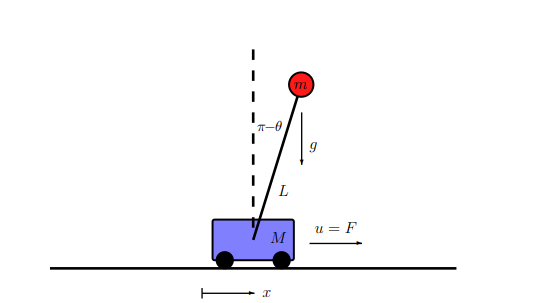

This is a 2 degree of freedom system $ x $ and $ \theta $. With newtons second law we get 4 coupled ODEs. First order non linear odes 
$$ X = [x, \dot{x}, \theta, \dot{\theta} ] $$ 
$$ \frac{d}{dt}x = f(x) $$
We can linearize the system about its fixed points. to get linear equations $ \dot x = Ax + Bu $, where u is the force on the cart in the x direction
$$ \theta = 0,\pi $$
$$ \dot \theta = 0 $$
$$ \dot x  = 0 $$
$ x $ is a free variable 



In [ ]:
def u_(K,y,y_ref):
    return np.dot(-K, (y - y_ref))

def cartpend(x,t,m,M,L,g,d,K,x_ref): 
    #d is damping on the cart
    u = u_(K, x, x_ref)
    s_x = np.sin(x[2]) # theta
    c_x = np.cos(x[2])
    D = m*L*L*(M+m*(1-c_x**2))

    dx = np.zeros(4)
    dx[0] = x[1]
    dx[1] = (1/D)*(-m**2*L**2*g*c_x*s_x + m*L**2*(m*L*x[3]**2*s_x - d *x[1])) + m*L*L*(1/D)*u
    dx[2] = x[3]
    dx[3] = (1/D)*((m+M)*m*g*L*s_x - m*L*c_x*(m*L*x[3]**2*s_x - d*x[1])) - m*L*c_x*(1/D)*u

    return dx


The non linear dynamical equations above are tedious  but can driven from Euler-lagrange 
Derivation of equations of motion:
https://www.youtube.com/watch?v=Fo7kuUAHj3s 

The force enters through the x dot and the theta dot. 

In [ ]:
from scipy.integrate import odeint
import pandas as pd
import plotly.express as px
from plotting import pend_cart_animation 

# Initialization 
m = 1
M = 5
L = 2 
g = -10
d = 1
K = np.zeros(4)

b = 1; #Pendulum up (b=1)

t_start =0
t_stop = 10
dt = 0.05
# X 
x0= np.array([0,0,np.pi,0.5])
x_ref= np.array([1,0,np.pi,0.5])

t_odeint = np.arange(t_start,t_stop+1, dt)

y_odeint  = odeint ( cartpend, x0, t_odeint, args = (m,M,L,g,d,K,x_ref), rtol =1e-11, atol = 1e-12 )

In [ ]:
#from scipy.integrate import solve_ivp
#t_span = [0 ,2]
#sol = solve_ivp(fun = cartpend, t_span = t_span, y0 = y0, args = (m,M,L,g,d,u) , dense_output=True)


In [ ]:
df_results = pd.DataFrame()
df_results['time'] = t_odeint
df_results['x'] = y_odeint[:,0]
df_results['v'] = y_odeint[:,1]
df_results['theta'] = y_odeint[:,2]
df_results['omega'] = y_odeint[:,3]
pend_cart_animation(df_results, x0)

We will design the controller about the linearized model about a fixed  point. And apply it to the ture non linear system.

We will check the controllability of the system about this point


In [ ]:
m = 1
M = 5
L = 2
g = -10
d = 1
b = 1# Pendulum up (b=1) Pendulum down (b=-1)
A = np.array([
    [0, 1, 0, 0],
    [0, -d/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -b*d/(M*L), -b*(m+M)*g/(M*L), 0]
])
B = np.array([0, 1/M, 0, b*1/(M*L)]).reshape(4,1)


We can see one of the eigenvalue is unstable 

In [ ]:
linalg.eig(A)[0]


In [ ]:
control.ctrb(A, B)

In [ ]:
np.linalg.matrix_rank (control.ctrb(A, B)) 

The rank is 4, we can span all of the state space with the controllability subspace. We can develop a controller to controll the system
$$ u =  -Kx $$
$$ \dot x =(A  - KB)x $$
Design K such that they can be where we want.
We will move the unstable eigenvalue to the stable left half of the plane, with some proportional feedback of x. 

## Pole Placement for the Inverted Pendulum on a Cart 

If the system is controllable with the full state feedback (pos, vel) we can design the controller. 

In [ ]:
desired_eigen = [ -1.1, -1.2, - 1.3, - 1.4]
K = control.place(A, B, desired_eigen)
K

In [ ]:
# Check if the controller has the desired eigenvalues
linalg.eig(A-B*K)[0]


Following are some test Eigenvalues( poles) 

Faster more aggressive further on the -ve plane


In [ ]:
desired_eigen = [ -0.3, -0.4, -0.5, -0.6]
desired_eigen = [ -1, -1.1, -1.2, -1.3]
desired_eigen = [ -2, -2.1, -2.2, -2.3]
desired_eigen = [ -5, -5.1, -5.2, -5.3]

In [ ]:
K = control.place(A, B, desired_eigen)
K

In [ ]:
t_start =0
t_stop = 5
dt = 0.05
# X 
x0= np.array([0,0,np.pi,0.5])
x_ref= np.array([-1,0,np.pi,0])

t_odeint = np.arange(t_start,t_stop+1, dt)

In [ ]:
y_odeint  = odeint ( cartpend, x0, t_odeint, args = (m,M,L,g,d,K,x_ref), rtol =1e-11, atol = 1e-12 )

In [ ]:
df_results = pd.DataFrame()
df_results['time'] = t_odeint
df_results['x'] = y_odeint[:,0]
df_results['v'] = y_odeint[:,1]
df_results['theta'] = y_odeint[:,2]
df_results['omega'] = y_odeint[:,3]

fig = px.line(df_results, x="time", y=['x','theta','v', 'omega'], title='Cart pendulum')
fig.show()

In [ ]:
pend_cart_animation(df_results, x0)

Moving the eigenvalues into the left half of the plane makes the systems respond faster, and agressive. 
The system also gets very jerky, a lot of control atority (actuator force) is needed to get the system to respond.

If the poles are moved too far in to the left domain the system becomes unstable bacasue the nonlinear drynamics.

As we move the poles to the left we increse the system dymanics, we make it faster but less robust. The nonlinear system might not act like the linearized system we built our controller around. 

There is an ideal set of  eigenvalues balancing time and control effort. This ths the Linear Quadratic Regulator, this gives us an optimal gian matrix K. 

## Linear Quadratic Regulator (LQR) Control for the Inverted Pendulum on a Cart

Where do we place the eigenvalues (poles)?
LQR
If we can make a cost function on how slow the system is and a cost on how expensive the actuation is (force, energy) 

Q (nxn) matrix that tells how bad the penelty it is  if x is not where we want it to be. Similarly R is he cost of the actuation 

$$ J = \int_{0}^{\infty} (x^TQx + u^TRu )  dt $$

$$
Q= 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0  \\
0 & 0 & 10 & 0  \\
0 & 0  & 0  & 100
\end{bmatrix}
$$

The diagonal terms in the Q matrix represent the penalties for each of states in the state vector. E.g if we want more cost in a certian terms we can increase it in orders of magnitude as a start. 

$$
R= 0.001
$$

Very low cost to R in this case, e.g low energy cost very powerful motor.

* This a linear controller, its linear matrix times the state. Full state feedback control. 
* It minimises a quadratic cost funtion, and has a well defined minimum cost 
* Regulator is simply saying it stablizes the system. 

In [ ]:
Q = np.diag([1,1,10,100]) # % 4x4 identify matrix
R = .001

In [ ]:
K, S, E = control.lqr(A,B,Q,R)
print("K: ", K)
print("EigenValues: ", E)

Takes one of the eignevalues and makes it really aggressive, maybe the $ \dot \theta$. We can probe this further. Looking at the first column of the eigenvectors, corresponding to the most stable eigenvalue. The biggest terms are for $ \dot x$ and $ \dot \theta $.

The controller  wants aggressive control for $ \dot x$ and $ \dot \theta $.

LQR (Riccati equation) can be expensive for high dimentional systems $ O(n^3) $.
This is optimal full state feedback control with respect to the  cost function.

In [ ]:
w,v = linalg.eig(A-B*K)
print("Eigenvalues: ", np.real(w))
# 
print("First Column of the eigen vectors: ", np.real(v[:,0]))

In [ ]:
y_odeint  = odeint ( cartpend, x0, t_odeint, args = (m,M,L,g,d,K,x_ref), rtol =1e-11, atol = 1e-12 )

In [ ]:
df_results = pd.DataFrame()
df_results['time'] = t_odeint
df_results['x'] = y_odeint[:,0]
df_results['v'] = y_odeint[:,1]
df_results['theta'] = y_odeint[:,2]
df_results['omega'] = y_odeint[:,3]

fig = px.line(df_results, x="time", y=['x','theta','v', 'omega'], title='Cart pendulum')
fig.show()

In [ ]:
pend_cart_animation(df_results, x0)

## Motivation for Full-State Estimation

$$ \dot x = Ax + Bu \text{ } x \in \mathbb{R}^n \text { }  u \in \mathbb{R}^q \$$

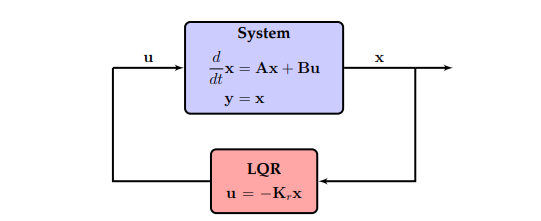

Full state is being measured and is used in the controller and is feedback to the system.
$$ \dot x = Ax - BKx \\ 
 \dot x = (A - BK)x $$
The regulator can be called $K_r $

In real life we ofter dont have access to all the variables $x$, only know $y$. Can we back out the full state? 

$$ y = C x \text { }  y \in \mathbb{R}^p$$ 

In many cases we can get a full estimation wiht one row / measurement. Before we were  looking at the controllability ctrb(A,B ), now we will be looking at the observability obsv(A,B). Both problems are similar in terms of linear algebra. 

Obvs: Can I estimate any high dimentional states x from a time series of my measurements of y(t)

Even in a very high order system we can estiamate the states of our system from very few measurements, if we know what the dynamics are. Rank of obvs(A, C) is full

We would like to estimate the full feedback, we know that if we have that and optimal controller is really easy to get. We need to develop an observer or esimator to do that. 
We will develop an estimator, in this case the kalman filter. The output of the estimator will be the full state-feed back. Both x and u make its way to the kalman filter.  

This is a linear dynamical system that estimates the full state $\hat x$.

The same techniques used to develop the LQR will be used for the  optimal KF estimator .

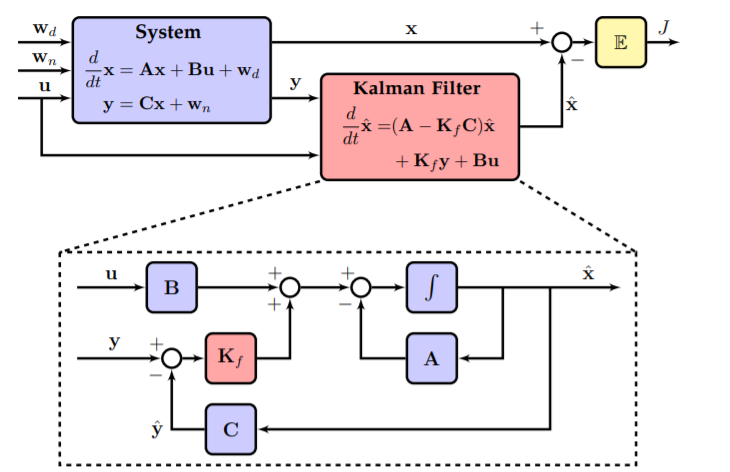

The combine system of the optimal controller and estimator will still be optimal.

# Observability

There is a duality between controllability and observability. 

$$ \mathscr{O} = \begin{bmatrix}C & CA & CA^2 &....&CA^{n-1}\end{bmatrix}^T$$

1) Observable of the rank (row space) of the matrix spans n

2) If this true we can estimate the full state x form y. 

KF is a linear dynamical system the eigenvalues of which tell us how fast the estimate $ \hat x $ converges to $ x $. We can do eigenvalues placement to make the system faster of slower. A real system has noise so we dont want the KF to be too aggresive. It may over emphasize noise.

In a similar manner there is an Obvs gramian. In the most observable direction the signal to noise will be the best. 

In [ ]:
# np.linalg.matrix_rank (control.obsv(A, C)) 
# U ,D, V= np.linalg.svd(control.obsv(A, C))

# The rows of np.transpose(V) are the most observable states in the state space. 

## Full-State Estimation

$x,u$ --> [Estimator] --> $ \hat x $

This estimator (not a KF yet) is a dynamical system. Filter gain $ K_f $

$$ \frac{d}{dt} \hat x = A \hat x + B u + K_f(y-\hat y) $$
$$ \hat y = C \hat x $$

This is similar to the dynamical system for , except everytime we get a measurement we compare it to what we think it should be and correct it if there is a difference. $ K_f(y-\hat y) $ is the update.

$$ \frac{d}{dt} \hat x = A \hat x + B u + K_fy- K_fC \hat x $$
$$ \frac{d}{dt} \hat x = (A - K_fC )\hat x + 
\begin{bmatrix}B & K_f \end{bmatrix} 
\begin{bmatrix} u \\ y\end{bmatrix} $$
